In [1]:
import cv2
import os 
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
image_path = './cloud_images/original/2021_11_16__13_45_20_crop.jpg'

In [3]:
img = cv2.imread(image_path,0) # covert image to gray scale

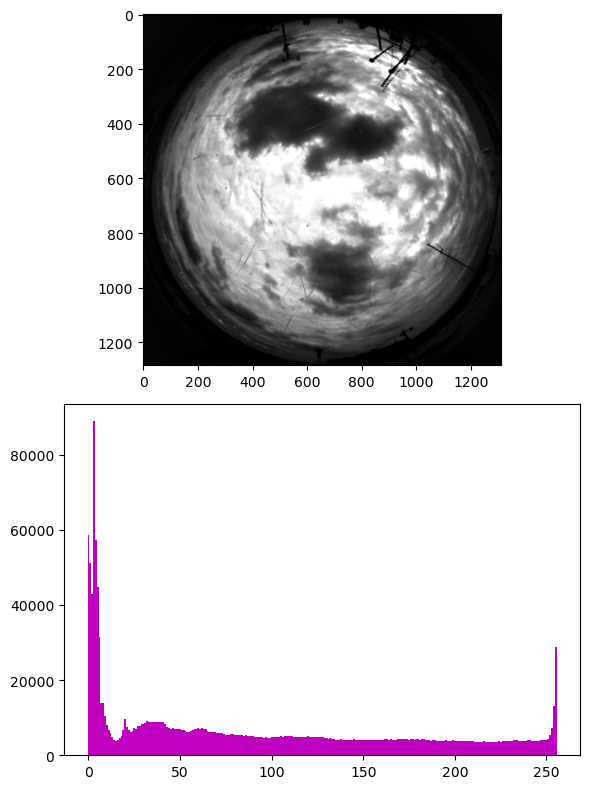

In [4]:
plt.figure(figsize=[6,8])
plt.subplot(211) # วาดภาพเดิมแบบขาวดำ
plt.imshow(img,cmap='gray')
plt.subplot(212) # วาดฮิสโทแกรม
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.bar(np.arange(256),hist[:,0],1,color='m')
plt.tight_layout()
plt.show()

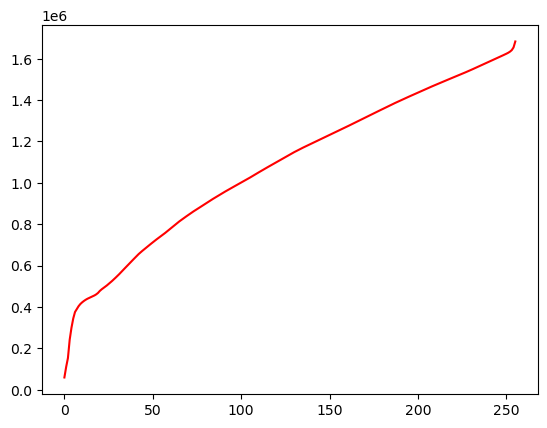

In [5]:
plt.plot(hist[:,0].cumsum(),'r') #คำนวณผลบวกสะสมในอาเรย์ของฮิสโทแกรมโดยใช้ .cumsum()
plt.show()

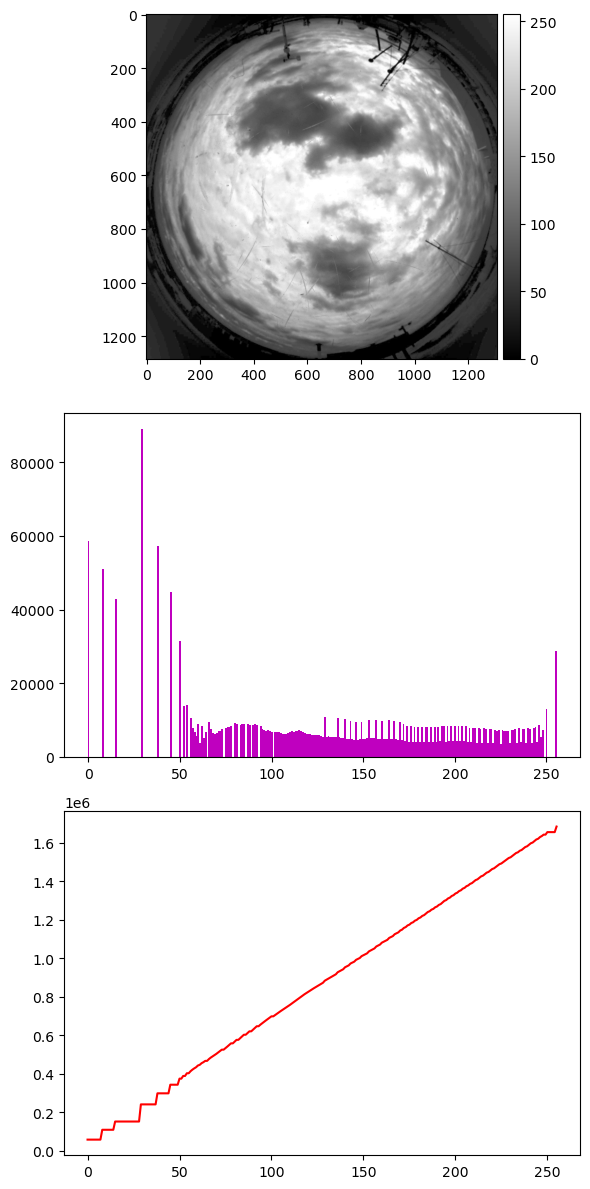

In [6]:
## การนำฮิสโทแกรมมาปรับให้เรียบ
img_eql = cv2.equalizeHist(img)
plt.figure(figsize=[6,12])
plt.subplot(311) # ภาพหลังการปรับ
plt.imshow(img_eql,cmap='gray')
plt.colorbar(pad=0.01)

plt.subplot(312) # ฮิสโทแกรม
hist_eql = cv2.calcHist([img_eql],[0],None,[256],[0,256])
plt.bar(np.arange(256),hist_eql[:,0],1,color='m')

plt.subplot(313) # ผลบวกสะสมของฮิสโทแกรม
plt.plot(hist_eql[:,0].cumsum(),'r')

plt.tight_layout()
plt.show()

In [7]:
## วิธีการ CLAHE
clahe = cv2.createCLAHE() # สร้างออบเจ็กต์ CLAHE
img_clahe = clahe.apply(img) # เริ่มทำการแปลง

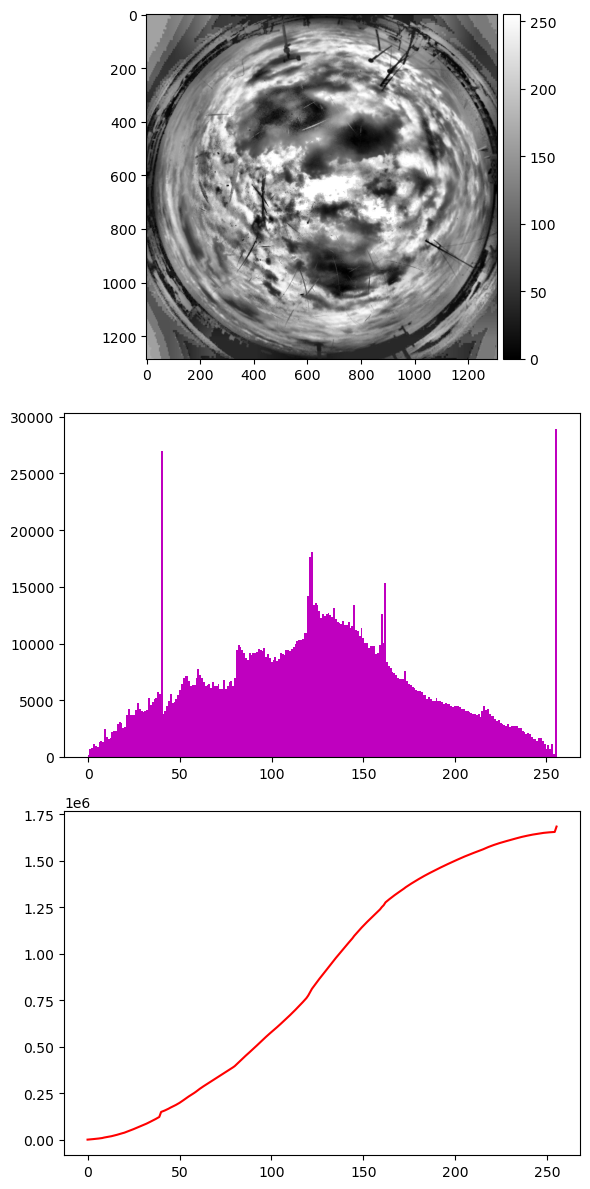

In [8]:
plt.figure(figsize=[6,12])
plt.subplot(311)
plt.imshow(img_clahe,cmap='gray')
plt.colorbar(pad=0.01)

plt.subplot(312)
hist_clahe = cv2.calcHist([img_clahe],[0],None,[256],[0,256])
plt.bar(np.arange(256),hist_clahe[:,0],1,color='m')

plt.subplot(313)
plt.plot(hist_clahe[:,0].cumsum(),'r')

plt.tight_layout()
plt.show()

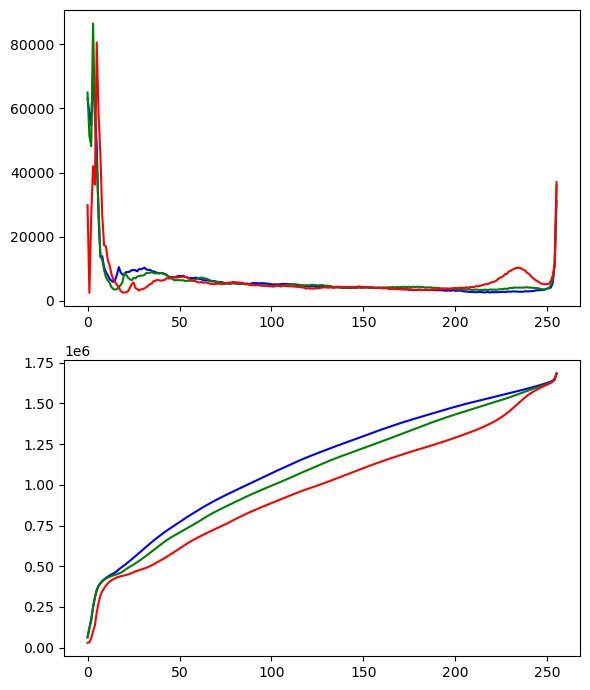

In [9]:
## การใช้ฮิสโทแกรมกับภาพสี
img_color = cv2.imread(image_path)
image_origin = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) # แปลงภาพเป็น RGB
plt.figure(figsize=[6,7])
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
for i,c in enumerate('bgr'):
    hist = cv2.calcHist([image_origin],[i],None,[256],[0,256])
    ax1.plot(hist,c) # ฮิสโทแกรม
    ax2.plot(hist.cumsum(),c) # ผลบวกสะสม
plt.tight_layout()
plt.show()

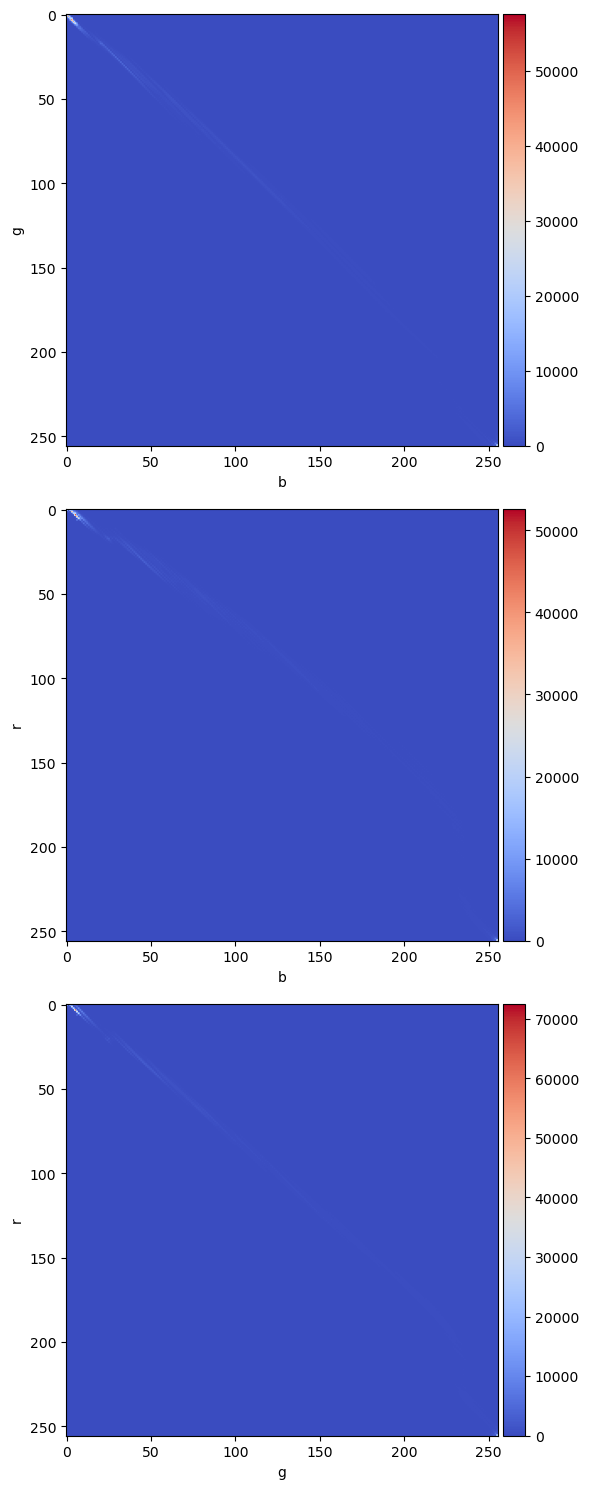

In [10]:
hist = cv2.calcHist([image_origin],[0,1,2],None,[256,256,256],[0,256,0,256,0,256])
plt.figure(figsize=[6,15])

# น้ำเงิน-เขียว
plt.subplot(311,xlabel='b',ylabel='g')
plt.imshow(hist.sum(2),cmap='coolwarm')
plt.colorbar(pad=0.01)
# น้ำเงิน-แดง
plt.subplot(312,xlabel='b',ylabel='r')
plt.imshow(hist.sum(1),cmap='coolwarm')
plt.colorbar(pad=0.01)
# เขียว-แดง
plt.subplot(313,xlabel='g',ylabel='r')
plt.imshow(hist.sum(0),cmap='coolwarm')
plt.colorbar(pad=0.01)

plt.tight_layout()
plt.show()

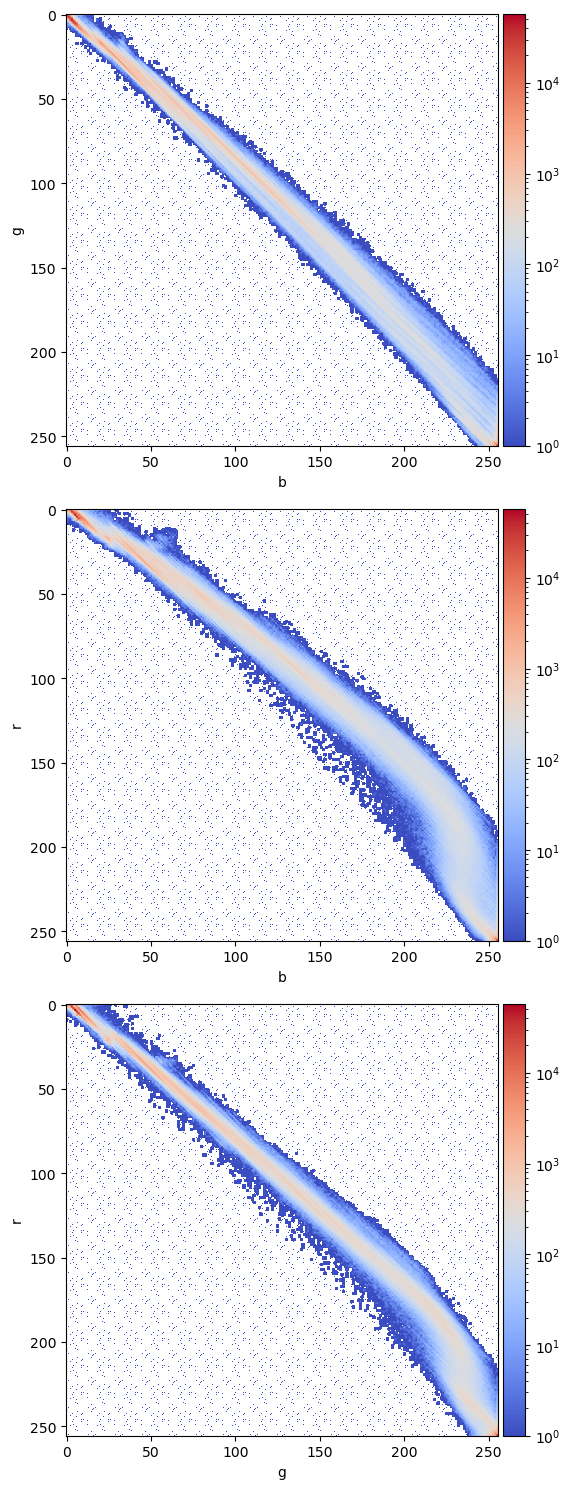

In [11]:
import matplotlib as mpl
lognorm = mpl.colors.LogNorm()

plt.figure(figsize=[6,15])
for i,(xl,yl) in enumerate(['bg','br','gr']):
    plt.subplot(311+i,xlabel=xl,ylabel=yl)
    plt.imshow(hist.sum(2-i),cmap='coolwarm',norm=lognorm)
    plt.colorbar(pad=0.01)

plt.tight_layout()
plt.show()

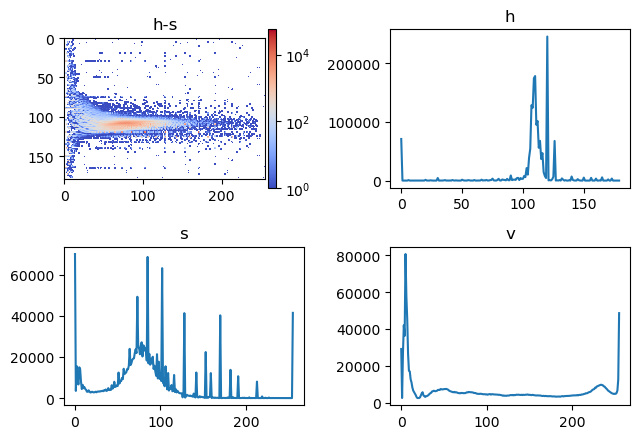

In [12]:
## ฮิสโทแกรมของสีในระบบ HSV
rin = cv2.imread(image_path)
rin_hsv = cv2.cvtColor(rin,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([rin_hsv],[0,1,2],None,[180,256,256],[0,180,0,256,0,256])
plt.figure(figsize=[6.5,4.5])

plt.subplot(221,title='h-s')
plt.imshow(hist.sum(2),cmap='coolwarm',norm=lognorm)
plt.colorbar(pad=0.01)

plt.subplot(222,title='h')
plt.plot(hist.sum(2).sum(1))
plt.subplot(223,title='s')
plt.plot(hist.sum(2).sum(0))
plt.subplot(224,title='v')
plt.plot(hist.sum(1).sum(0))

plt.tight_layout()
plt.show()

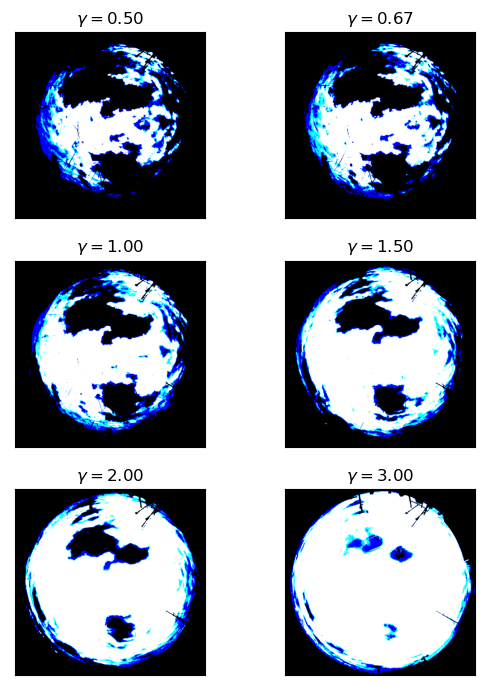

In [18]:
teto = cv2.imread(image_path)
teto = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
gamma = [1/2,2/3,1,1.5,2,3] # ค่าแกมมาที่จะลองใช้
plt.figure(figsize=[6,7])
ar0255 = np.arange(0,256)/255
for i,g in enumerate(gamma):
    plt.subplot(321+i,title='$\gamma=%.2f$'%g,xticks=[],yticks=[])
    # สร้างตัวเทียบแปลงตามค่าแกมมา
    lut = (255*ar0255**(1/g)).astype(np.uint8)
    # แปลงสีตามตัวเทียบแปลงที่เตรียมไว้
    teto_gamma = cv2.LUT(teto,lut)
    ret3, otsu3 = cv2.threshold(teto_gamma,127,255,cv2.THRESH_BINARY)
    plt.imshow(otsu3, cmap='gray')
plt.tight_layout()
plt.show()

In [14]:
ret, otsu = cv2.threshold(img_eql,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

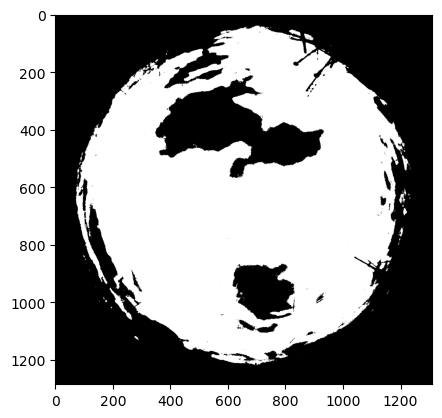

In [15]:
plt.imshow(otsu, cmap='gray') ## ภาพที่ทำ eql